In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.optimize
import requests

In [2]:
# from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
from lmfit.models import GaussianModel
from astropy.timeseries import LombScargle as lst

In [3]:
#somewhat arbitrarily used a few plotting colors
#set them to variables here so they can be easily changed
c1 = 'cornflowerblue'
c2 = 'navy'
c3 = 'rebeccapurple'
c4 = '#CF6275'
c5 = 'maroon'


In [4]:
from read_grbs import getgrb
from read_grbs import plotgrb

In [5]:
GRB = '00112453'
GRB = '00114299'
d, d_fit, d_ul = getgrb(GRB)

00114299_flux.txt
https://www.swift.ac.uk/xrt_curves/00114299/flux.qdp


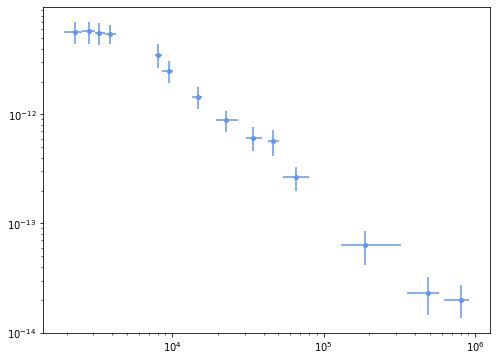

In [22]:
plotgrb(d)

In [37]:
xf = np.log10(d_fit['t'])
yf = np.log10(d_fit['f'])


x = d_fit['t']
xu = d_fit['tu']
xl = d_fit['tl']

y= d_fit['f']
yu = d_fit['fu']
yl = d_fit['fl']

In [38]:
def lin(x, a, b):
    x = np.array(x)
    return a*x + b

In [39]:
fit_params, pcov = scipy.optimize.curve_fit(lin, xf, yf)
fit_params

array([-1.05661668, -7.48976568])

In [40]:
y_fit2 = lin(xf, *fit_params)

Text(0, 0.5, 'flux')

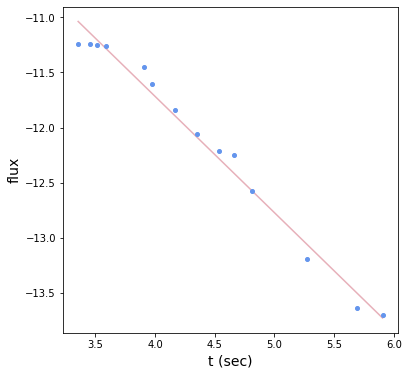

In [48]:
plt.figure(figsize = (6,6))

# plt.errorbar(x,y,xerr=[-xl,xu],yerr=[-yl,yu],marker='o'
#              ,markersize=4,color=c1,ls=' ')

plt.errorbar(xf,yf,marker='o'
             ,markersize=4,color=c1,ls=' ')

# plt.plot(10**xf, 10**y_fit2,color=c4,alpha=.5,label='lin fit')

plt.plot(xf, y_fit2,color=c4,alpha=.5,label='lin fit')
# plt.legend()
# plt.xticks(np.arange(0,20,2))
plt.xlabel('t (sec)',fontsize=14)
plt.ylabel('flux',fontsize=14)

# plt.yscale('log')
# plt.xscale('log')

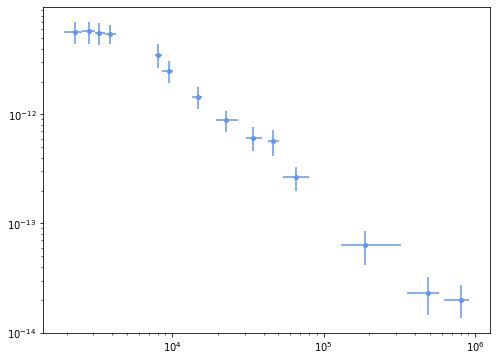

In [16]:
x = d_fit['t']
xu = d_fit['tu']
xl = d_fit['tl']

y= d_fit['f']
yu = d_fit['fu']
yl = d_fit['fl']

x_ul= d_ul['t']
xu_ul = d_ul['tu']
xl_ul = d_ul['tl']

y_ul= d_ul['f']


plt.figure(figsize=(8,6))
plt.errorbar(x,y,xerr=[-xl,xu],yerr=[-yl,yu],marker='o'
             ,markersize=4,color=c1,ls=' ')

plt.errorbar(x_ul, y_ul, xerr=xu_ul,yerr=y_ul/2, uplims=y_ul,ls=' ',color=c4)

#flipped y axis since showing magnitudes

plt.yscale('log')
plt.xscale('log')